In [1]:
!pip install fear_greed_index

    100% |████████████████████████████████| 3.1MB 3.6MB/s eta 0:00:01
    100% |████████████████████████████████| 7.3MB 2.3MB/s eta 0:00:01
    100% |████████████████████████████████| 9.2MB 1.2MB/s ta 0:00:011    95% |██████████████████████████████▋ | 8.7MB 17.1MB/s eta 0:00:01
    100% |████████████████████████████████| 3.1MB 3.6MB/s eta 0:00:01    30% |█████████▉                      | 942kB 3.5MB/s eta 0:00:01
    100% |████████████████████████████████| 102kB 12.0MB/s a 0:00:01
    100% |████████████████████████████████| 102kB 12.1MB/s a 0:00:01
    100% |████████████████████████████████| 92kB 18.9MB/s ta 0:00:01
    100% |████████████████████████████████| 122kB 13.7MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 20.3MB/s ta 0:00:01
    100% |████████████████████████████████| 16.9MB 1.1MB/s eta 0:00:01   21% |██████▊                         | 3.6MB 13.1MB/s eta 0:00:02    87% |████████████████████████████    | 14.7MB 24.1MB/s eta 0:00:01
    100% |██████████████████

  Stored in directory: /Users/Lucas/Library/Caches/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
tables 3.5.1 requires mock>=2.0, which is not installed.
spyder 3.3.3 requires pyqt5<=5.12; python_version >= "3", which is not installed.
matplotlib 3.5.2 has requirement packaging>=20.0, but you'll have packaging 19.0 which is incompatible.
  Found existing installation: Sphinx 1.8.5
    Uninstalling Sphinx-1.8.5:
      Successfully uninstalled Sphinx-1.8.5
  Found existing installation: numpy 1.16.2
    Uninstalling numpy-1.16.2:
      Successfully uninstalled numpy-1.16.2
  Found existing installation: Pillow 5.4.1
    Uninstalling Pillow-5.4.1:
      Successfully uninstalled Pillow-5.4.1
  Found existing installation: matplotlib 3.0.3
    Uninstalling matplotlib-3.0.3:
      Successfully uninstalled matplotlib-3.0.3


In [2]:
BASE_URL = "https://production.dataviz.cnn.io/index/fearandgreed/graphdata"

In [3]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 8)

C:\Users\Lucas\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [11]:
# https://freshprinceofstandarderror.com/finance/fear-and-greed-index-data-in-python/
BASE_URL = "https://production.dataviz.cnn.io/index/fearandgreed/graphdata"
START_DATE = '2022-04-12'

r = requests.get("https://production.dataviz.cnn.io/index/fearandgreed/graphdata/2021-01-01")
data = r.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [48]:
fear_greed_index = pd.DataFrame(data['fear_and_greed_historical']['data'])
fear_greed_index['x'] = pd.to_datetime(fear_greed_index['x']//1000, unit='s').dt.strftime('%Y-%m-%d')
fear_greed_index = fear_greed_index.rename(columns={'x':'date','y':'fear_metric'})

KeyError: 'fear_and_greed_historical'

In [15]:
fear_greed_index = fear_greed_index.drop_duplicates() 

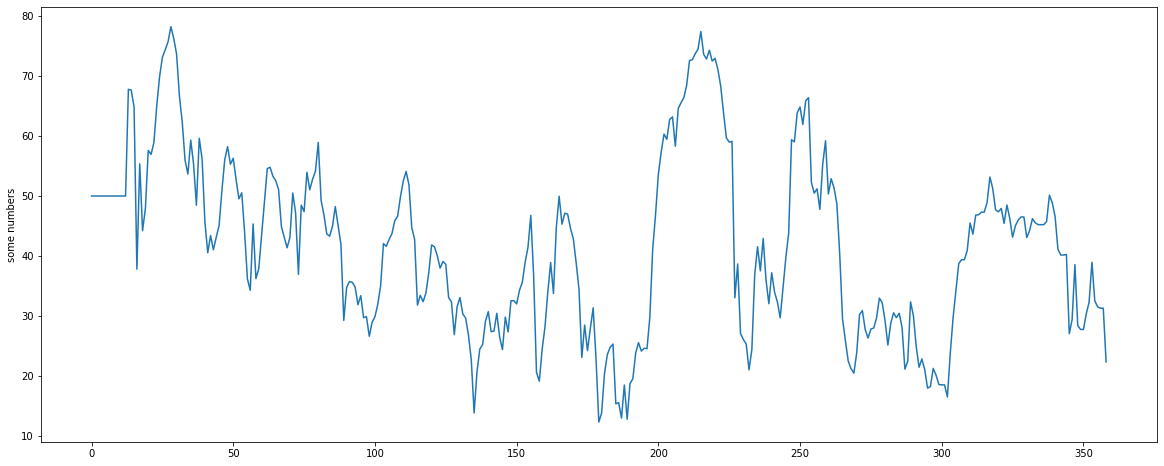

In [16]:
plt.plot(fear_greed_index.fear_metric)
plt.ylabel('some numbers')
plt.show()

In [24]:
fear_greed_index.tail(10)

,date,fear_metric,rating
349,2022-04-30,27.7333,fear
350,2022-05-01,27.7333,fear
351,2022-05-02,30.3383,fear
352,2022-05-03,32.2783,fear
353,2022-05-04,38.9479,fear
354,2022-05-05,32.5426,fear
355,2022-05-06,31.5121,fear
356,2022-05-07,31.2830,fear
357,2022-05-08,31.2830,fear
358,2022-05-09,22.3281,extreme fear


In [34]:
fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date'], format='%Y-%m-%d')

In [39]:
import yfinance as yf
ticker = '^GSPC'
start_dt = '2011-01-03'

df_yf=yf.download(
        ticker,
#         period = "1y",
        start = start_dt,
        interval = "1d",
        group_by = 'ticker',
        prepost = True,
        threads = True,
        proxy = None
    )
df_yf.columns = [x.lower() for x in df_yf.columns]

[*********************100%***********************]  1 of 1 completed


In [23]:
fear_greed_index.head(2)

NameError: name 'fear_greed_index' is not defined

In [38]:
df = pd.merge(df_yf, fear_greed_index, how='inner', left_index = True, right_on = 'date').reset_index(drop=True)

In [39]:
df.head(2)

,open,high,low,close,adj close,volume,date,fear_metric,rating
0,4228.290039,4236.390137,4188.129883,4188.430176,4188.430176,3678970000,2021-05-10,45.066667,neutral
1,4150.339844,4162.040039,4111.529785,4152.100098,4152.100098,3593110000,2021-05-11,41.933333,fear


In [30]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig5 = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig5.add_trace(
    go.Scatter(x=fear_greed_index.date, y=fear_greed_index.fear_metric, name="gf_index"),
    secondary_y=True,
)

fig5.add_trace(
#     go.Scatter(x=result.upload_date, y=result.adjclose_filled, name="adjclose filled"),
#     secondary_y=True
    go.Candlestick(x=df_yf.index,
                open=df_yf.open, high=df_yf.high,
                low=df_yf.low, close=df_yf.close)
)

# Add figure title
fig5.update_layout(
    title_text=f"gf_index and S&P500"
)

# Set x-axis title
fig5.update_xaxes(title_text="time")
fig5.update_layout(xaxis_rangeslider_visible=False)
# Set y-axes titles
fig5.update_yaxes(title_text="gf_index", secondary_y=False)
fig5.update_yaxes(title_text="S%P500", secondary_y=True)

fig5.show()

# fig5.write_html(f"{analysis_output_folder}/{stock}_sentiment_and_price.html")

In [44]:
past_year_df = pd.read_csv("1year_gfi.csv")

,date,fgi,rating
0,2020-07-31,50.000000,neutral
1,2020-08-03,50.000000,neutral
2,2020-08-04,50.000000,neutral
3,2020-08-05,50.000000,neutral
4,2020-08-06,50.000000,neutral
...,...,...,...
445,2022-05-06,16.257143,extreme fear
446,2022-05-09,10.219048,extreme fear
447,2022-05-10,10.866667,extreme fear
448,2022-05-11,8.037594,extreme fear


In [102]:
past_year_df = past_year_df[past_year_df.date >= '2020-09-18'].copy()

In [104]:
hist_df = pd.read_csv("fear-greed.csv")
hist_df = hist_df[['Date','Fear Greed']].rename(columns={'Fear Greed': 'fgi', 'Date':'date'})

In [105]:
hist_df.date.values

array(['2011/1/3', '2011/1/4', '2011/1/5', ..., '2020/9/16', '2020/9/17',
       '2020/9/18'], dtype=object)

In [106]:
hist_df = pd.concat([past_year_df[['date','fgi']], hist_df],axis=0,ignore_index=True).sort_values(by='date').reset_index(drop=True)

In [115]:
hist_df.shape

(2861, 2)

In [114]:
hist_df.date.nunique()

2860

In [117]:
hist_df[hist_df.date.isin(hist_df[hist_df.duplicated(subset='date')].date.values)].sort_index().head(60)

,date,fgi
2264,2020-09-18,50.0
2512,2020-09-18,52.0


In [111]:
hist_df['date'] = pd.to_datetime(hist_df['date'], format='%Y-%m-%d')

In [149]:
df = pd.merge(df_yf, hist_df, how='inner', left_index = True, right_on = 'date').reset_index(drop=True).sort_values(by='date')

In [150]:
df

,open,high,low,close,adj close,volume,date,fgi
0,1257.619995,1276.170044,1257.619995,1271.869995,1271.869995,4286670000,2011-01-03,68.000000
1,1272.949951,1274.119995,1262.660034,1270.199951,1270.199951,4796420000,2011-01-04,68.000000
2,1268.780029,1277.630005,1265.359985,1276.560059,1276.560059,4764920000,2011-01-05,67.000000
3,1276.290039,1278.170044,1270.430054,1273.849976,1273.849976,4844100000,2011-01-06,64.000000
4,1274.410034,1276.829956,1261.699951,1271.500000,1271.500000,4963110000,2011-01-07,63.000000
...,...,...,...,...,...,...,...,...
2856,4128.169922,4157.689941,4067.909912,4123.339844,4123.339844,4254300000,2022-05-06,16.257143
2857,4081.270020,4081.270020,3975.479980,3991.239990,3991.239990,4746120000,2022-05-09,10.219048
2858,4035.179932,4068.820068,3958.169922,4001.050049,4001.050049,4630150000,2022-05-10,10.866667
2859,3990.080078,4049.090088,3928.820068,3935.179932,3935.179932,4683220000,2022-05-11,8.037594


In [151]:
df = df[~df.date.between('2020-09-21', '2021-01-21')]
df.shape

(2776, 8)

In [152]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig5 = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig5.add_trace(
    go.Scatter(x=df.date, y=df.fgi, name="gf_index"),
    secondary_y=True,
)

fig5.add_trace(
#     go.Scatter(x=result.upload_date, y=result.adjclose_filled, name="adjclose filled"),
#     secondary_y=True
    go.Candlestick(x=df.date,
                open=df.open, high=df.high,
                low=df.low, close=df.close)
)

# Add figure title
fig5.update_layout(
    title_text=f"gf_index and S&P500"
)

# Set x-axis title
fig5.update_xaxes(title_text="time")
fig5.update_layout(xaxis_rangeslider_visible=False)
# Set y-axes titles
fig5.update_yaxes(title_text="gf_index", secondary_y=False)
fig5.update_yaxes(title_text="S%P500", secondary_y=True)

fig5.show()

fig5.write_html(f"./plots/fgi_sp500_2012.html")

In [154]:
df = df.set_index('date')

In [155]:
df.head(2)

,open,high,low,close,adj close,volume,fgi
date,,,,,,,
2011-01-03,1257.619995,1276.170044,1257.619995,1271.869995,1271.869995,4286670000,68.0
2011-01-04,1272.949951,1274.119995,1262.660034,1270.199951,1270.199951,4796420000,68.0


In [161]:
tmp = df[df.index>='2020-02-01'].copy()
for i, row in tmp.iterrows():
    print(str(i)[:10], row.fgi)

2020-02-03 46.0
2020-02-04 55.0
2020-02-05 60.0
2020-02-06 64.0
2020-02-07 57.0
2020-02-10 55.0
2020-02-11 56.0
2020-02-12 59.0
2020-02-13 58.0
2020-02-14 55.0
2020-02-18 51.0
2020-02-19 53.0
2020-02-20 50.0
2020-02-21 44.0
2020-02-24 29.0
2020-02-25 22.0
2020-02-26 21.0
2020-02-27 13.0
2020-02-28 10.0
2020-03-02 14.0
2020-03-03 10.0
2020-03-04 15.0
2020-03-05 9.0
2020-03-06 7.0
2020-03-09 3.0
2020-03-10 6.0
2020-03-11 4.0
2020-03-12 2.0
2020-03-13 5.0
2020-03-16 3.0
2020-03-17 4.0
2020-03-18 5.0
2020-03-19 7.0
2020-03-20 8.0
2020-03-23 5.0
2020-03-24 13.0
2020-03-25 17.0
2020-03-26 22.0
2020-03-27 23.0
2020-03-30 25.0
2020-03-31 25.0
2020-04-01 22.0
2020-04-02 21.0
2020-04-03 22.0
2020-04-06 27.0
2020-04-07 25.0
2020-04-08 31.0
2020-04-09 43.0
2020-04-13 37.0
2020-04-14 45.0
2020-04-15 41.0
2020-04-16 42.0
2020-04-17 44.0
2020-04-20 41.0
2020-04-21 40.0
2020-04-22 40.0
2020-04-23 40.0
2020-04-24 39.0
2020-04-27 42.0
2020-04-28 41.0
2020-04-29 47.0
2020-04-30 47.0
2020-05-01 42.0
2020-

In [163]:
def calculate_portfolio_metrics(df, th1, th2=None, INITIAL_CASH = 50000, NUM_SHARES_PER_TRADE = 1):
    strategy_df = df.copy()
#     strategy_df.loc[strategy_df.label - strategy_df.projected_price < th1, 'buy'] = 1
#     strategy_df.loc[strategy_df.label - strategy_df.projected_price > th2, 'sell'] = 1
    strategy_df.loc[strategy_df.fgi < th1, 'buy'] = 1
    strategy_df.loc[strategy_df.fgi > th2, 'sell'] = 1
    strategy_df.loc[strategy_df.buy==1, 'action'] = 1
    strategy_df.loc[strategy_df.sell==1, 'action'] = -1
    strategy_df.loc[strategy_df.action.isnull(), 'action'] = 0

    strategy_df['Trade'] = strategy_df.action - strategy_df.action.shift(1)
    trade_tmp = strategy_df['Trade']
    trade_tmp[0] = strategy_df['action'].values[0]
    strategy_df['Trade'] = trade_tmp

    strategy_df['pos'] = strategy_df.Trade * strategy_df.close * NUM_SHARES_PER_TRADE
    strategy_df['holdings'] = strategy_df.action * NUM_SHARES_PER_TRADE * strategy_df.close
    strategy_df['cash'] = INITIAL_CASH - strategy_df['pos'].cumsum()
    strategy_df['total'] = strategy_df.cash + strategy_df.holdings
    strategy_df['pnl'] = strategy_df['total']  - INITIAL_CASH
    return strategy_df

strategy_df = calculate_portfolio_metrics(df[df.index>='2020-02-01'], th1=10, th2=90)

C:\Users\Lucas\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [166]:
strategy_df.head(50)

,open,high,low,label,adj close,volume,fgi,buy,sell,action,Trade,pos,holdings,cash,total,pnl
date,,,,,,,,,,,,,,,,
2020-02-03,3235.659912,3268.439941,3235.659912,3248.919922,3248.919922,3757910000,46.0,NaN,NaN,0.0,0.0,0.000000,0.000000,50000.000000,50000.000000,0.000000
2020-02-04,3280.610107,3306.919922,3280.610107,3297.590088,3297.590088,3995320000,55.0,NaN,NaN,0.0,0.0,0.000000,0.000000,50000.000000,50000.000000,0.000000
2020-02-05,3324.909912,3337.580078,3313.750000,3334.689941,3334.689941,4117730000,60.0,NaN,NaN,0.0,0.0,0.000000,0.000000,50000.000000,50000.000000,0.000000
2020-02-06,3344.919922,3347.959961,3334.389893,3345.780029,3345.780029,3868370000,64.0,NaN,NaN,0.0,0.0,0.000000,0.000000,50000.000000,50000.000000,0.000000
2020-02-07,3335.540039,3341.419922,3322.120117,3327.709961,3327.709961,3730650000,57.0,NaN,NaN,0.0,0.0,0.000000,0.000000,50000.000000,50000.000000,0.000000
2020-02-10,3318.280029,3352.260010,3317.770020,3352.090088,3352.090088,3450350000,55.0,NaN,NaN,0.0,0.0,0.000000,0.000000,50000.000000,50000.000000,0.000000
2020-02-11,3365.870117,3375.629883,3352.719971,3357.750000,3357.750000,3760550000,56.0,NaN,NaN,0.0,0.0,0.000000,0.000000,50000.000000,50000.000000,0.000000
2020-02-12,3370.500000,3381.469971,3369.719971,3379.449951,3379.449951,3926380000,59.0,NaN,NaN,0.0,0.0,0.000000,0.000000,50000.000000,50000.000000,0.000000
2020-02-13,3365.899902,3385.090088,3360.520020,3373.939941,3373.939941,3498240000,58.0,NaN,NaN,0.0,0.0,0.000000,0.000000,50000.000000,50000.000000,0.000000


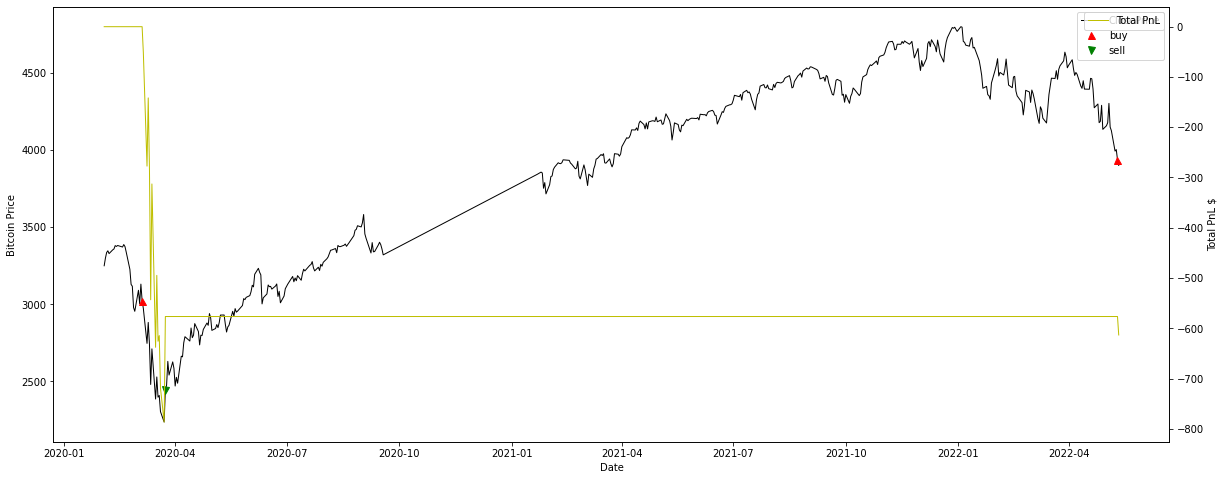

In [165]:
strategy_df.rename(columns={'close': 'label'}, inplace=True)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(strategy_df.index, strategy_df.label, color='k', lw=1., label='ClosePrice')
ax2.plot(strategy_df.index, strategy_df.pnl, color='y', lw=1, label='Total PnL')
ax1.plot(strategy_df.loc[strategy_df.Trade == 1].index, strategy_df.label[strategy_df.Trade == 1], color='r', lw=0, marker='^', markersize=7, label='buy')
ax1.plot(strategy_df.loc[strategy_df.Trade == -1].index, strategy_df.label[strategy_df.Trade == -1], color='g', lw=0, marker='v', markersize=7, label='sell')

ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price', color='k')
ax2.set_ylabel('Total PnL $', color='k')

ax1.legend()
ax2.legend()
plt.show()